In [1719]:
import zipfile
import pandas as pd
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.preprocessing import LabelEncoder

# Unzipping the uploaded file
zip_path = "/Users/hyunghoon/Desktop/머신러닝연습/부동산허위매물/open.zip"
extracted_path = "/Users/hyunghoon/Desktop/머신러닝연습/부동산허위매물/open/"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# Loading the CSV files
train_path = extracted_path + "train.csv"
test_path = extracted_path + "test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Check missing values
print("Missing values in train data:")
print(train_df.isnull().sum())
print("\nMissing values in test data:")
print(test_df.isnull().sum())


Missing values in train data:
ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      787
해당층       229
총층         16
방향          0
방수         16
욕실수        18
주차가능여부      0
총주차대수     696
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
허위매물여부      0
dtype: int64

Missing values in test data:
ID          0
매물확인방식      0
보증금         0
월세          0
전용면적      184
해당층        50
총층          2
방향          0
방수          2
욕실수         2
주차가능여부      0
총주차대수     175
관리비         0
중개사무소       0
제공플랫폼       0
게재일         0
dtype: int64


# KNN imputation

In [1720]:
# Imputation using KNN
numeric_columns = ['전용면적', '해당층', '총층',  '총주차대수'] #'방수', '욕실수',

def apply_imputation(df):
    # Select only numeric columns for imputation
    numeric_data = df[numeric_columns]
    
    # KNN Imputer initialization
    imputer = KNNImputer(n_neighbors=3)
    
    # Perform imputation
    imputed_data = imputer.fit_transform(numeric_data)
    
    # Convert imputed data back to DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=numeric_columns)
    
    # Apply imputed data to original DataFrame
    df[numeric_columns] = imputed_df
    
    return df


In [1721]:
def apply_imputation_for_test(df):
    # Select only numeric columns for imputation
    numeric_data = df[numeric_columns]
    
    # KNN Imputer initialization
    imputer = KNNImputer(n_neighbors=3)
    
    # Perform imputation
    
    imputed_data = imputer.fit_transform(numeric_data)
    
    # Convert imputed data back to DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=numeric_columns)
    
    # Apply imputed data to original DataFrame
    df[numeric_columns] = imputed_df
    
    return df

In [1722]:
# Apply imputation
train_df = apply_imputation(train_df)


In [1723]:
test_df = apply_imputation_for_test(test_df)

In [1724]:
# Verify no missing values remain
print("After imputation:")
print(train_df[numeric_columns].isnull().sum())
print(test_df[numeric_columns].isnull().sum())

After imputation:
전용면적     0
해당층      0
총층       0
총주차대수    0
dtype: int64
전용면적     0
해당층      0
총층       0
총주차대수    0
dtype: int64


In [1725]:
display(train_df.head(1))
display(test_df.head(1))

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,17.5,12.333333,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
0,TEST_000,서류확인,223000000.0,530000,26.37,5.0,5.0,남향,1.0,1.0,불가능,2.0,7,Z86Th6S3K5,D플랫폼,2024-10-21


In [1726]:
# Feature Engineering

train_df['면적대비가격'] = (train_df['보증금'] + train_df['월세'] * 100) / train_df['전용면적']
train_df['층간비율'] = train_df['해당층'] / train_df['총층']

# '게재일' 컬럼을 datetime 자료형으로 변환
train_df['게재일'] = pd.to_datetime(train_df['게재일'])

# 월 추출
train_df['month'] = train_df['게재일'].dt.month

# 월에 따른 계절 매핑 (기상계절 기준)
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# 계절 파생변수 생성
train_df['season'] = train_df['month'].apply(month_to_season)

In [1727]:
test_df['면적대비가격'] = (test_df['보증금'] + test_df['월세'] * 100) / test_df['전용면적']
test_df['층간비율'] = test_df['해당층'] / test_df['총층']

test_df['게재일'] = pd.to_datetime(test_df['게재일'])

# 월 추출
test_df['month'] = test_df['게재일'].dt.month
test_df['season'] = test_df['month'].apply(month_to_season)

In [1728]:
display(train_df.head(1))
display(test_df.head(1))

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,...,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,면적대비가격,층간비율,month,season
0,TRAIN_0000,현장확인,402500000.0,470000,17.5,12.333333,15.0,서향,1.0,1.0,...,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0,2.568571e+07,0.822222,10,Fall


,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,면적대비가격,층간비율,month,season
0,TEST_000,서류확인,223000000.0,530000,26.37,5.0,5.0,남향,1.0,1.0,불가능,2.0,7,Z86Th6S3K5,D플랫폼,2024-10-21,1.046644e+07,1.0,10,Fall


# 필요없는 열 제거

In [1729]:

# Drop unnecessary columns
train_df.drop(['ID','총주차대수', '방수', '욕실수'], axis=1, inplace=True) # 개제일, 중개사무소 
test_id = test_df['ID']              # # 개제일, 중개사무소 
test_df.drop(['ID', '총주차대수','방수', '욕실수'], axis=1, inplace=True)



In [1730]:
# Categorical Columns Detection and Encoding
categorical_cols = train_df.select_dtypes(include=["object"]).columns
print("Categorical Columns:", categorical_cols.tolist())


Categorical Columns: ['매물확인방식', '방향', '주차가능여부', '중개사무소', '제공플랫폼', 'season']


In [1731]:
# cols = ['방향','season','제공플랫폼']

# # Encoding categorical columns
# encoders = {}  # Store encoders for later use
# for col in cols:
#     le = LabelEncoder()
#     train_df[col] = le.fit_transform(train_df[col])  # Train data transformation
#     test_df[col] = le.transform(test_df[col])  # Test data transformation
#     encoders[col] = le  # Store the encoder

label_encode_cols = ['중개사무소', '게재일', '제공플랫폼', '방향', 'season']
for col in label_encode_cols:
    le = LabelEncoder()
    combined_data = pd.concat([train_df[col], test_df[col]], axis=0).astype(str)
    le.fit(combined_data)
    train_df[col] = le.transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))


In [1732]:
# One-Hot Encoding for '제공플랫폼'
train_df = pd.get_dummies(train_df, columns=['주차가능여부','매물확인방식']) # 제공플랫폼
test_df = pd.get_dummies(test_df, columns=['주차가능여부','매물확인방식']) #제공플랫폼

# Check for column consistency after One-Hot Encoding (train and test must have the same columns)
# train_df, test_df = train_df.align(test_df, join='left', axis=1, fill_value=0)


In [1733]:
display(train_df.head(1))
display(test_df.head(1))

,보증금,월세,전용면적,해당층,총층,방향,관리비,중개사무소,제공플랫폼,게재일,허위매물여부,면적대비가격,층간비율,month,season,주차가능여부_가능,주차가능여부_불가능,매물확인방식_서류확인,매물확인방식_전화확인,매물확인방식_현장확인
0,402500000.0,470000,17.5,12.333333,15.0,7,96,256,1,408,0,2.568571e+07,0.822222,10,0,True,False,False,False,True


,보증금,월세,전용면적,해당층,총층,방향,관리비,중개사무소,제공플랫폼,게재일,면적대비가격,층간비율,month,season,주차가능여부_가능,주차가능여부_불가능,매물확인방식_서류확인,매물확인방식_전화확인,매물확인방식_현장확인
0,223000000.0,530000,26.37,5.0,5.0,2,7,151,3,420,1.046644e+07,1.0,10,0,False,True,True,False,False


In [1734]:
print(train_df.isnull().sum())
print(test_df.isnull().sum())

보증금            0
월세             0
전용면적           0
해당층            0
총층             0
방향             0
관리비            0
중개사무소          0
제공플랫폼          0
게재일            0
허위매물여부         0
면적대비가격         0
층간비율           0
month          0
season         0
주차가능여부_가능      0
주차가능여부_불가능     0
매물확인방식_서류확인    0
매물확인방식_전화확인    0
매물확인방식_현장확인    0
dtype: int64
보증금            0
월세             0
전용면적           0
해당층            0
총층             0
방향             0
관리비            0
중개사무소          0
제공플랫폼          0
게재일            0
면적대비가격         0
층간비율           0
month          0
season         0
주차가능여부_가능      0
주차가능여부_불가능     0
매물확인방식_서류확인    0
매물확인방식_전화확인    0
매물확인방식_현장확인    0
dtype: int64


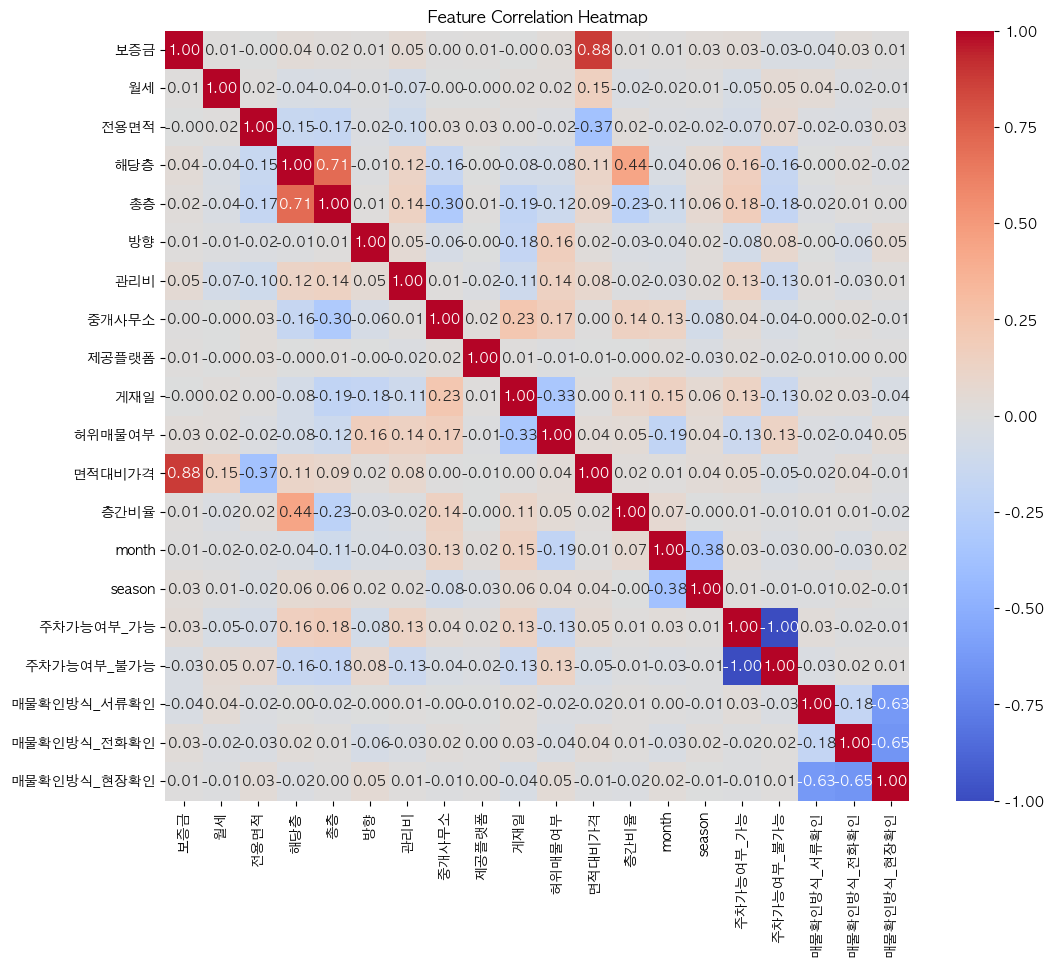

In [1735]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

# 상관관계 행렬 계산
corr_matrix = train_df.corr()

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [1736]:
y = train_df['허위매물여부']
train_df.drop(['허위매물여부'], axis=1, inplace=True)

Class Distribution: Counter({0: 2154, 1: 298})


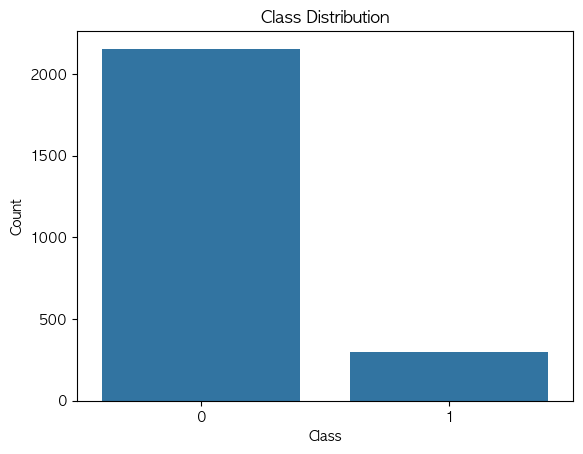

In [1737]:
import numpy as np
from collections import Counter

# y_train 분포 확인 (클래스 개수 출력)
print("Class Distribution:", Counter(y))

# 시각화
sns.barplot(x=list(Counter(y).keys()), y=list(Counter(y).values()))
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.show()

In [1738]:
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Scaling numeric features
scaler = StandardScaler() #RobustScaler() #MinMaxScaler

# Exclude categorical columns from scaling
exclude_cols = ['매물확인방식', '방향', '주차가능여부','season']


# Select numeric columns to scale
numeric_cols_train = [col for col in train_df.columns if col not in exclude_cols]
numeric_cols_test = [col for col in test_df.columns if col not in exclude_cols]

# Apply scaling to numeric columns
train_df[numeric_cols_train] = scaler.fit_transform(train_df[numeric_cols_train])
test_df[numeric_cols_test] = scaler.transform(test_df[numeric_cols_test])

# Check the processed data
print("Processed train data:")
print(train_df.head())
print("Processed test data:")
print(test_df.head())


Processed train data:
        보증금        월세      전용면적       해당층        총층  방향        관리비     중개사무소  \
0  2.021210  0.434046 -1.372762  2.114126  1.417361   7  16.078407  1.640330   
1  0.107882 -0.874199 -0.687118 -0.543013 -0.825773   0  -0.972991  1.459292   
2 -0.358080 -0.002035  0.969512 -0.827707 -1.029694   3  -0.972991  0.520157   
3  0.050152 -1.697909  1.210426 -0.543013  0.193834   0   0.803196 -0.894203   
4  1.555249  0.724768 -0.050481 -0.543013 -1.029694   3  -0.972991 -0.396348   

      제공플랫폼       게재일    면적대비가격      층간비율     month  season  주차가능여부_가능  \
0 -0.277385  0.481460  3.327093  0.772376  0.560380       0   0.991068   
1  0.717712  1.067798  0.153265  0.463340  1.150481       3  -1.009013   
2 -0.774934  0.857318 -0.597192  0.106760  0.855431       0  -1.009013   
3 -0.774934  0.842283 -0.562729 -1.319560  0.855431       0   0.991068   
4 -0.277385 -0.315359  1.303706  1.533080 -0.619823       2  -1.009013   

   주차가능여부_불가능  매물확인방식_서류확인  매물확인방식_전화확인  매물확인방식_현장확인

In [1739]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE, ADASYN


In [1740]:
x_train, x_valid, y_train,y_valid = train_test_split(train_df, y, test_size=0.15, random_state=0, stratify=y)

# DATA AUGUMENTATION

In [1741]:
print("Before SMOTE:", dict(zip(*np.unique(y_train, return_counts=True))))

Before SMOTE: {0: 1831, 1: 253}


In [1742]:
# SMOTE 적용 (소수 클래스에 대해 오버샘플링)
smote = ADASYN(
    n_neighbors= 4,       # KNN 개수
    sampling_strategy='auto', 
    random_state=0,     # 재현성 보장
            
)
#smote = BorderlineSMOTE(sampling_strategy='auto')  # 'auto'는 소수 클래스에 대해 자동으로 샘플링 #  k_neighbors=3
x_train, y_train = smote.fit_resample(x_train, y_train)

In [1743]:
# SMOTE 적용 후 클래스 분포 확인
print("After augumentation:", dict(zip(*np.unique(y_train, return_counts=True))))

After augumentation: {0: 1831, 1: 1821}


In [1744]:
print("PCA 이전 train 데이터 형태:", x_train.shape)
print("PCA 이전 valid 데이터 형태:", x_valid.shape)
print("PCA 이전 test 데이터 형태:", test_df.shape)

PCA 이전 train 데이터 형태: (3652, 19)
PCA 이전 valid 데이터 형태: (368, 19)
PCA 이전 test 데이터 형태: (613, 19)


In [1745]:
print(x_train.shape)
print(y_train.shape)

(3652, 19)
(3652,)


# 차원축소

In [1746]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)  # 주성분 개수 설정
# x_train = pca.fit_transform(x_train)
# x_valid = pca.transform(x_valid)
# test_df = pca.transform(test_df)

# # 결과 확인
# print("PCA 이후 train 데이터 형태:", x_train.shape)
# print("PCA 이후 valid 데이터 형태:", x_valid.shape)
# print("PCA 이후 test 데이터 형태:", test_df.shape)

In [1708]:
#train_df[['전용면적', '
# 해당층', '총층']].describe()  # 수치형 특성 분포 확인
#train_df[['매물확인방식', '방향']].value_counts()  # 범주형 특성 분포 분석

# MACHINE LEARNING MODELS

In [1747]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier




In [1748]:
ridge = LogisticRegression(penalty= 'l1', solver = 'saga')
elasticnet = LogisticRegression(penalty='l2')
rdb = RandomForestClassifier(class_weight='balanced'
                               
                              )
ada = AdaBoostClassifier()

best_params_forxgboost = {'learning_rate': 0.04199630035031584,
 'n_estimators': 859,
 'max_depth': 5,
 'min_child_weight': 0.5222930361321483,
 'subsample': 0.8894885475081695,
 'colsample_bytree': 0.6985863441288725,
 'reg_alpha': 0.0011999031625662903,
 'reg_lambda': 0.756819765848095,
 'gamma': 0.04711734917678012}
xgb = XGBClassifier(scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)), **best_params_forxgboost)

xgbrf = XGBRFClassifier(scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)))
svc = BalancedRandomForestClassifier(sampling_strategy='all', replacement=True, bootstrap=False)
lgbm = LGBMClassifier(scale_pos_weight=(sum(y_train == 0) / sum(y_train == 1)),colsample_bytree=0.7327575467369435,
               learning_rate=0.039071905080266756, max_depth=7,
               min_child_samples=38, n_estimators=291, num_leaves=213,
               reg_alpha=0.06811265491013706, reg_lambda=0.11380851183788578,
               subsample=0.8459571849483574)


cat = CatBoostClassifier()
dt = DecisionTreeClassifier(class_weight='balanced')
et = ExtraTreeClassifier(class_weight='balanced')


# stacking
meta_model_xgb = XGBClassifier(n_estimators=100)
base_learners = [
    ('xgb', xgb),
    ('lgb', lgbm)
]

stacking = StackingClassifier(estimators=base_learners, final_estimator=meta_model_xgb)



In [1749]:
ridge.fit(x_train, y_train)
elasticnet.fit(x_train, y_train)
rdb.fit(x_train, y_train)
ada.fit(x_train, y_train)
xgb.fit(x_train, y_train)
xgbrf.fit(x_train, y_train)
svc.fit(x_train, y_train)
lgbm.fit(x_train, y_train)
cat.fit(x_train, y_train)
dt.fit(x_train, y_train)
et.fit(x_train, y_train)
stacking.fit(x_train, y_train)




[LightGBM] [Info] Number of positive: 1821, number of negative: 1831
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3212
[LightGBM] [Info] Number of data points in the train set: 3652, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498631 -> initscore=-0.005476
[LightGBM] [Info] Start training from score -0.005476
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

StackingClassifier(estimators=[('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=0.6985863441288725,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None,
                                              gamma=0.04711734917678012,
                                              grow_policy=None,
                                              importance_type=None,
                                              interacti...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [1750]:
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier



model1 = HistGradientBoostingClassifier(
    learning_rate=0.2368,
    max_iter=677,
    max_depth=11,
    l2_regularization=6.7094,
    min_samples_leaf=8,
    max_leaf_nodes=182,
    
)



model1.fit(x_train, y_train)

preds1 = model1.predict(x_valid)

# 정확도 평가
accuracy = f1_score(y_valid, preds1, average='macro')
print(f'Final accuracy with best parameters: {accuracy}')

Final accuracy with best parameters: 0.9199986621849863


In [1754]:
print(stacking.score(x_valid, y_valid))
print(ada.score(x_valid, y_valid))
print(xgb.score(x_valid, y_valid))
print(xgbrf.score(x_valid, y_valid))
print(svc.score(x_valid, y_valid))
print(lgbm.score(x_valid,y_valid))
print(cat.score(x_valid,y_valid))
print(dt.score(x_valid,y_valid))
print(et.score(x_valid,y_valid))


0.9565217391304348
0.9266304347826086
0.9646739130434783
0.9266304347826086
0.9402173913043478
0.967391304347826
0.9483695652173914
0.9266304347826086
0.8804347826086957


In [1755]:
pred4 = stacking.predict(x_valid)
pred5 = ada.predict(x_valid)
pred6 = xgb.predict(x_valid)
pred7 = xgbrf.predict(x_valid)
pred8 = svc.predict(x_valid)
pred9 = lgbm.predict(x_valid)
pred10 = cat.predict(x_valid)
pred11 = dt.predict(x_valid)
pred12 = et.predict(x_valid)



In [1756]:
print("=" * 30)
print(f1_score(y_valid, pred4, average='macro'))
print(f1_score(y_valid, pred5, average='macro'))
print(f1_score(y_valid, pred6, average='macro'))
print(f1_score(y_valid, pred7, average='macro'))
print(f1_score(y_valid, pred8, average='macro'))
print(f1_score(y_valid, pred9, average='macro'))
print(f1_score(y_valid, pred10, average='macro'))
print(f1_score(y_valid, pred11, average='macro'))
print(f1_score(y_valid, pred12, average='macro'))
print("=" * 30)

0.9024325578312455
0.8500339597011547
0.9184939091915836
0.8546156885123568
0.8727044025157233
0.9254658385093169
0.8871948760143911
0.8523691365912367
0.7683150183150182


In [1631]:
from sklearn.metrics import f1_score

models = {
    'stacking': stacking,
    'ridge': ridge,
    'elasticnet': elasticnet,
    'rdb': rdb,
    'ada': ada,
    'xgb': xgb,
    'xgbrf': xgbrf,
    'svc': svc,
    'lgbm': lgbm,
    'cat': cat,
    'dt': dt,
    'model1': model1
}

high_f1_models = {}

for name, model in models.items():
    pred = model.predict(x_valid)
    f1 = f1_score(y_valid, pred, average='macro')
    if f1 >= 0.90:
        high_f1_models[name] = f1

for name, f1 in high_f1_models.items():
    print(f"{name}: {f1:.4f}")


stacking: 0.9024
xgb: 0.9185
lgbm: 0.9255
model1: 0.9200


# BaggingClassifier

In [1634]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# XGBoost에 배깅 적용
bagging_xgb = BaggingClassifier(base_estimator=lgbm, n_estimators=100)

# 모델 학습
bagging_xgb.fit(x_train, y_train)

# 예측
y_pred = bagging_xgb.predict(x_valid)

# F1 score 계산
f1 = f1_score(y_valid, y_pred, average='macro')
print(f"F1 Score (macro) with bagging: {f1}")


[LightGBM] [Info] Number of positive: 1821, number of negative: 1831
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000318 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3212
[LightGBM] [Info] Number of data points in the train set: 3652, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.488499 -> initscore=-0.046010
[LightGBM] [Info] Start training from score -0.046010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

# Voting Classifier

In [1639]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('lgbm', lgbm),
       # ('xgb', xgb),
        ('HGradientBoost', model1),
        
    ], 
    voting='hard' , #weights=[1, 4, 1] # 'soft'도 가능하지만, SVC는 predict_proba를 지원하지 않음
)

# 5. 모델 학습
#voting_clf.fit(x_train, y_train)
voting_clf.fit(train_df, y)


# 6. 예측 및 평가 (F1 Score with balanced)
y_pred = voting_clf.predict(x_valid)
f1 = f1_score(y_valid, y_pred, average='macro')

print(f"Voting Classifier F1 Score (macro): {f1:.4f}")

[LightGBM] [Info] Number of positive: 298, number of negative: 2154
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000563 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1536
[LightGBM] [Info] Number of data points in the train set: 2452, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121533 -> initscore=-1.977988
[LightGBM] [Info] Start training from score -1.977988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [1640]:
sub = voting_clf.predict(test_df)
sub

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

In [1641]:
sample = pd.read_csv('/Users/hyunghoon/Desktop/머신러닝연습/부동산허위매물/open/sample_submission.csv')
sample

,ID,허위매물여부
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0
...,...,...
608,TEST_608,0
609,TEST_609,0
610,TEST_610,0
611,TEST_611,0


In [1642]:
sample['허위매물여부'] = sub
sample

,ID,허위매물여부
0,TEST_000,0
1,TEST_001,0
2,TEST_002,1
3,TEST_003,0
4,TEST_004,0
...,...,...
608,TEST_608,0
609,TEST_609,0
610,TEST_610,0
611,TEST_611,0


In [1643]:
sample.to_csv('voting_all_hard2.csv', index=False)

# HGB Optuna

In [771]:
import optuna
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




# Optuna 최적화 함수 정의
def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_iter": trial.suggest_int("max_iter", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "l2_regularization": trial.suggest_float("l2_regularization", 0, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 100),
        "max_leaf_nodes": trial.suggest_int("max_leaf_nodes", 10, 300),
    }
    
    # 모델 학습
    model = HistGradientBoostingClassifier(**params, random_state=42)
    model.fit(x_train, y_train)
    
    # 예측 및 평가
    preds = model.predict(x_valid)
    accuracy = accuracy_score(y_valid, preds)
    
    return accuracy  # 최대화할 목표 (accuracy)

# Optuna 실행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# 최적의 하이퍼파라미터 출력
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)


/Users/hyunghoon/miniconda3/envs/workspace/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:15: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
[I 2025-02-12 22:54:32,715] A new study created in memory with name: no-name-87f144b2-938c-45f2-82fb-022c55f187e3
[I 2025-02-12 22:54:36,627] Trial 0 finished with value: 0.9619565217391305 and parameters: {'learning_rate': 0.06383706524629042, 'max_iter': 476, 'max_depth': 7, 'l2_regularization': 5.914998943622463, 'min_samples_leaf': 3, 'max_leaf_nodes': 205}. Best is trial 0 with value: 0.9619565217391305.
[I 2025-02-12 22:54:38,619] Trial 1 finished with value: 0.9592391304347826 and parameters: {'learning_rate': 0.26586899907334854, 'max_iter': 886, 'max_depth': 5, 'l2_regularization': 0.9609336679288882, 'min_s

Best parameters: {'learning_rate': 0.23679665033043382, 'max_iter': 677, 'max_depth': 11, 'l2_regularization': 6.709357689062237, 'min_samples_leaf': 8, 'max_leaf_nodes': 182}
Best accuracy: 0.9646739130434783


In [1592]:
from sklearn.ensemble import HistGradientBoostingClassifier



model1 = HistGradientBoostingClassifier(
    learning_rate=0.2368,
    max_iter=677,
    max_depth=11,
    l2_regularization=6.7094,
    min_samples_leaf=8,
    max_leaf_nodes=182,
    
)



model1.fit(x_train, y_train)

preds1 = model1.predict(x_valid)

# 정확도 평가
accuracy = f1_score(y_valid, preds1, average='macro')
print(f'Final accuracy with best parameters: {accuracy}')

Final accuracy with best parameters: 0.9146284881023397


# CatBoost Optuna

In [737]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split,  cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import f1_score, make_scorer



# 최적화할 objective 함수 정의
def objective(trial):
    # 하이퍼파라미터 범위 설정
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'depth': trial.suggest_int('depth', 3, 12),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1e-5, 10, log=True),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'loss_function': 'Logloss',  # 분류 문제에서 Logloss 사용
        'eval_metric': 'Accuracy'
    }

    # 모델 훈련
    model = CatBoostClassifier(**param, cat_features=[], verbose=0)
    model.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=100)
    

    # 예측 및 정확도 계산
    preds = model.predict(x_valid)
    f1 = cross_val_score(model, x_train, y_train, cv=5, scoring=make_scorer(f1_score, average="macro")).mean()
    #accuracy = f1_score(y_valid, preds)
    
    return f1
# Optuna로 하이퍼파라미터 최적화
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)  # 50번의 시도

# 최적의 파라미터와 성능 출력
print(f'Best parameters: {study.best_params}')
print(f'Best f1 score: {study.best_value}')


[I 2025-02-12 22:35:50,336] A new study created in memory with name: no-name-29943917-7946-43a0-9ecb-2c4b4a1c28a8
[I 2025-02-12 22:35:54,465] Trial 0 finished with value: 0.9658336405655362 and parameters: {'iterations': 765, 'learning_rate': 0.24611024504631704, 'depth': 6, 'l2_leaf_reg': 4.355553945778675e-05, 'border_count': 111}. Best is trial 0 with value: 0.9658336405655362.
[I 2025-02-12 22:36:36,851] Trial 1 finished with value: 0.9714812149653591 and parameters: {'iterations': 887, 'learning_rate': 0.09256833963086177, 'depth': 11, 'l2_leaf_reg': 0.00020770015293327488, 'border_count': 156}. Best is trial 1 with value: 0.9714812149653591.
[I 2025-02-12 22:36:40,029] Trial 2 finished with value: 0.9698760929607004 and parameters: {'iterations': 471, 'learning_rate': 0.22652761994849743, 'depth': 6, 'l2_leaf_reg': 0.014436570634061964, 'border_count': 190}. Best is trial 1 with value: 0.9714812149653591.
[I 2025-02-12 22:36:42,474] Trial 3 finished with value: 0.9663459108647829

Best parameters: {'iterations': 999, 'learning_rate': 0.05423531832182976, 'depth': 7, 'l2_leaf_reg': 0.08093691093852266, 'border_count': 164}
Best f1 score: 0.9752572199111784


In [738]:
cat_op = study.best_params
# 최적 하이퍼파라미터를 CatBoostClassifier에 적용
model = CatBoostClassifier(
    **cat_op
)

# 모델 훈련
model.fit(x_train, y_train)

# 예측
preds = model.predict(x_valid)

# 정확도 평가
accuracy = f1_score(y_valid, preds, average='macro')
print(f'Final accuracy with best parameters: {accuracy}')


0:	learn: 0.6155388	total: 2.94ms	remaining: 2.93s
1:	learn: 0.5557430	total: 4.91ms	remaining: 2.44s
2:	learn: 0.4894043	total: 6.8ms	remaining: 2.26s
3:	learn: 0.4400731	total: 9.06ms	remaining: 2.25s
4:	learn: 0.3904115	total: 11.8ms	remaining: 2.34s
5:	learn: 0.3547121	total: 13.6ms	remaining: 2.25s
6:	learn: 0.3335956	total: 15.4ms	remaining: 2.17s
7:	learn: 0.3072308	total: 17.2ms	remaining: 2.13s
8:	learn: 0.2887355	total: 18.9ms	remaining: 2.08s
9:	learn: 0.2713979	total: 20.5ms	remaining: 2.03s
10:	learn: 0.2549145	total: 22.4ms	remaining: 2.01s
11:	learn: 0.2396855	total: 24.1ms	remaining: 1.98s
12:	learn: 0.2226462	total: 26ms	remaining: 1.97s
13:	learn: 0.2138702	total: 28.3ms	remaining: 1.99s
14:	learn: 0.2064145	total: 29.8ms	remaining: 1.96s
15:	learn: 0.1963915	total: 31.4ms	remaining: 1.93s
16:	learn: 0.1863468	total: 33ms	remaining: 1.9s
17:	learn: 0.1812923	total: 34.7ms	remaining: 1.89s
18:	learn: 0.1756811	total: 36.3ms	remaining: 1.87s
19:	learn: 0.1701336	total: 

# LGBM Optuna

In [ ]:
import optuna
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import f1_score, make_scorer


# Optuna 최적화 함수 정의
def objective(trial):
    # 하이퍼파라미터 범위 설정
    params = {
        "objective": "binary",
        "boosting_type": "gbdt",
        "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "num_leaves": trial.suggest_int("num_leaves", 20, 300),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample": trial.suggest_uniform("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_uniform("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_loguniform("reg_alpha", 1e-3, 10.0),
        "reg_lambda": trial.suggest_loguniform("reg_lambda", 1e-3, 10.0),
    }

    # 모델 학습 및 평가 (교차 검증 사용)
    model = LGBMClassifier(**params)
    f1 = cross_val_score(model, x_train, y_train, cv=5, scoring=make_scorer(f1_score, average="macro")).mean()

    return f1

# Optuna 실행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# 최적의 하이퍼파라미터 출력
print("Best params:", study.best_params)

# 최적 파라미터로 모델 학습
best_params = study.best_params
final_model = LGBMClassifier(**best_params)

# XGBoost Optuna

[I 2025-02-12 23:11:21,483] A new study created in memory with name: no-name-6321b17d-bc21-49fd-8614-fcfc0283e94f
[I 2025-02-12 23:11:22,209] Trial 0 finished with value: 0.957240373483522 and parameters: {'learning_rate': 0.14236965469653914, 'n_estimators': 948, 'max_depth': 15, 'min_child_weight': 1.1404470699888691, 'subsample': 0.7589263135941033, 'colsample_bytree': 0.7496988205767712, 'reg_alpha': 0.001994025847172608, 'reg_lambda': 3.4976562478402062, 'gamma': 3.7727579511734595}. Best is trial 0 with value: 0.957240373483522.
[I 2025-02-12 23:11:22,864] Trial 1 finished with value: 0.9687833007059716 and parameters: {'learning_rate': 0.12341025141791509, 'n_estimators': 533, 'max_depth': 15, 'min_child_weight': 3.136634708441, 'subsample': 0.5340940743901235, 'colsample_bytree': 0.7991499604306609, 'reg_alpha': 0.0010191881813940463, 'reg_lambda': 0.10836185238727497, 'gamma': 0.00275519316052671}. Best is trial 1 with value: 0.9687833007059716.
[I 2025-02-12 23:11:23,497] Tri

Best params: {'learning_rate': 0.05128965697790522, 'n_estimators': 755, 'max_depth': 8, 'min_child_weight': 0.12012535193648574, 'subsample': 0.5926975847800322, 'colsample_bytree': 0.5965218523909062, 'reg_alpha': 0.00564075395098901, 'reg_lambda': 0.21515175518587284, 'gamma': 0.008322898521187899}


In [839]:
best_params_forxgboost = study.best_params
final_model = XGBClassifier(**best_params_forxgboost)
final_model.fit(x_train, y_train)
# 최종 검증 데이터 평가
y_valid_pred = final_model.predict(x_valid)
final_f1 = f1_score(y_valid, y_valid_pred, average="macro")
print("Final F1 Score on Validation Data:", final_f1)


Final F1 Score on Validation Data: 0.9076907640595997


In [799]:
best_params_forxgboost

{'learning_rate': 0.05128965697790522,
 'n_estimators': 755,
 'max_depth': 8,
 'min_child_weight': 0.12012535193648574,
 'subsample': 0.5926975847800322,
 'colsample_bytree': 0.5965218523909062,
 'reg_alpha': 0.00564075395098901,
 'reg_lambda': 0.21515175518587284,
 'gamma': 0.008322898521187899}

In [232]:
# Best params: {'learning_rate': 0.039071905080266756, 'n_estimators': 291, 'max_depth': 7, 'num_leaves': 213, 'min_child_samples': 38, 'subsample': 0.8459571849483574, 'colsample_bytree': 0.7327575467369435, 'reg_alpha': 0.06811265491013706, 'reg_lambda': 0.11380851183788578}

final_model.fit(train_df, y)

# 최종 검증 데이터 평가
# y_valid_pred = final_model.predict(x_valid)
# final_f1 = f1_score(y_valid, y_valid_pred, average="macro")
# print("Final F1 Score on Validation Data:", final_f1)

[LightGBM] [Info] Number of positive: 298, number of negative: 2154
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000510 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1522
[LightGBM] [Info] Number of data points in the train set: 2452, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.121533 -> initscore=-1.977988
[LightGBM] [Info] Start training from score -1.977988
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

LGBMClassifier(colsample_bytree=0.7327575467369435,
               learning_rate=0.039071905080266756, max_depth=7,
               min_child_samples=38, n_estimators=291, num_leaves=213,
               reg_alpha=0.06811265491013706, reg_lambda=0.11380851183788578,
               subsample=0.8459571849483574)

In [230]:
sub = voting_clf.predict(test_df)
sample = pd.read_csv('/Users/hyunghoon/Desktop/머신러닝연습/부동산허위매물/open/sample_submission.csv')
sample['허위매물여부'] = sub
sample


,ID,허위매물여부
0,TEST_000,0
1,TEST_001,0
2,TEST_002,1
3,TEST_003,0
4,TEST_004,0
...,...,...
608,TEST_608,0
609,TEST_609,0
610,TEST_610,0
611,TEST_611,0


In [231]:
sample.to_csv('new5.csv', index=False)

In [1293]:
train_df

,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,관리비,중개사무소,제공플랫폼,게재일,면적대비가격,층간비율,month,season,주차가능여부_가능,주차가능여부_불가능
0,2,2.021210,0.434046,-1.372762,2.114126,1.417361,7,16.078407,1.640330,-0.277385,0.481460,3.327093,0.772376,0.560380,0,0.991068,-0.991068
1,2,0.107882,-0.874199,-0.687118,-0.543013,-0.825773,0,-0.972991,1.459292,0.717712,1.067798,0.153265,0.463340,1.150481,3,-1.009013,1.009013
2,1,-0.358080,-0.002035,0.969512,-0.827707,-1.029694,3,-0.972991,0.520157,-0.774934,0.857318,-0.597192,0.106760,0.855431,0,-1.009013,1.009013
3,2,0.050152,-1.697909,1.210426,-0.543013,0.193834,0,0.803196,-0.894203,-0.774934,0.842283,-0.562729,-1.319560,0.855431,0,0.991068,-0.991068
4,2,1.555249,0.724768,-0.050481,-0.543013,-1.029694,3,-0.972991,-0.396348,-0.277385,-0.315359,1.303706,1.533080,-0.619823,2,-1.009013,1.009013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,0,0.013040,0.821675,2.948583,-0.543013,-1.029694,2,-0.972991,0.667250,-0.277385,0.767112,-0.602361,1.533080,0.855431,0,-1.009013,1.009013
2448,0,0.008916,1.790745,-0.406357,-0.827707,-0.825773,2,-0.617754,0.825659,-0.774934,0.458908,0.346334,-0.606400,0.560380,0,-1.009013,1.009013
2449,1,1.415048,1.112396,-1.372762,0.880454,2.436968,1,0.803196,-0.894203,-0.277385,-0.623562,2.700265,-1.034296,-0.914874,1,0.991068,-0.991068
2450,2,-1.042589,0.094872,-0.634905,0.880454,0.193834,0,0.447959,1.210365,-0.277385,0.000362,-0.836003,1.057640,-0.029722,2,0.991068,-0.991068
